In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv('../IR - 7.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [3]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [4]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
125463,"Inner Race (0.007"")",0.007,0.134984,0.415840
116318,Normal,0.000,0.038802,0.036160
26248,Normal,0.000,-0.042349,-0.018080
161650,"Inner Race (0.007"")",0.007,0.270779,-0.063280
112618,Normal,0.000,-0.025242,-0.034722
65446,Normal,0.000,0.023365,0.035133
206136,"Inner Race (0.007"")",0.007,-0.103146,0.155735
111639,Normal,0.000,0.047982,0.125122
55501,Normal,0.000,0.079691,0.037393
186659,"Inner Race (0.007"")",0.007,-0.058964,-0.060404


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
y = ct.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=3, units=3)`
  """Entry point for launching an IPython kernel.


In [12]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=3)`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.add(Dense(output_dim = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=2)`
  """Entry point for launching an IPython kernel.


In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:

model = classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100, shuffle = False)


C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
193792/193792 [==============================] - 2s 11us/step - loss: 0.3115 - accuracy: 0.9839
Epoch 2/100
193792/193792 [==============================] - 2s 10us/step - loss: 0.0496 - accuracy: 1.0000
Epoch 3/100
193792/193792 [==============================] - 2s 10us/step - loss: 0.0169 - accuracy: 1.0000
Epoch 4/100
193792/193792 [==============================] - 2s 9us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 5/100
193792/193792 [==============================] - 2s 10us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 6/100
193792/193792 [==============================] - 2s 9us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 7/100
193792/193792 [==============================] - 2s 9us/step - loss: 5.6772e-04 - accuracy: 1.0000
Epoch 8/100
193792/193792 [==============================] - 2s 10us/step - loss: 2.5240e-04 - accuracy: 1.0000
Epoch 9/100
193792/193792 [==============================] - 2s 9us/step - loss: 1.1253e-04 - accuracy: 1.0000
Epoch 10/100
193792/

193792/193792 [==============================] - 2s 9us/step - loss: 2.3739e-08 - accuracy: 1.0000
Epoch 74/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3677e-08 - accuracy: 1.0000
Epoch 75/100
193792/193792 [==============================] - ETA: 0s - loss: 2.3615e-08 - accuracy: 1.00 - 2s 9us/step - loss: 2.3616e-08 - accuracy: 1.0000
Epoch 76/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3555e-08 - accuracy: 1.0000
Epoch 77/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3494e-08 - accuracy: 1.0000
Epoch 78/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3432e-08 - accuracy: 1.0000
Epoch 79/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3365e-08 - accuracy: 1.0000
Epoch 80/100
193792/193792 [==============================] - 2s 9us/step - loss: 2.3291e-08 - accuracy: 1.0000
Epoch 81/100
193792/193792 [==============================] - 2s 9us/st

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

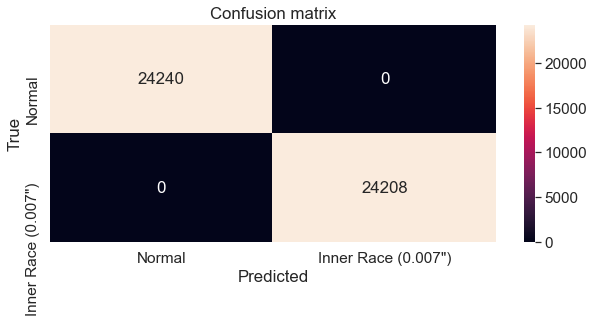

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.007")']  
columns = ['Normal', 'Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [18]:
classifier.evaluate(X_test, y_test)

48448/48448 [==============================] - 1s 14us/step


[2.274762838449721e-08, 1.0]

In [19]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     24240
Inner Race (0.007")       1.00      1.00      1.00     24208

          micro avg       1.00      1.00      1.00     48448
          macro avg       1.00      1.00      1.00     48448
       weighted avg       1.00      1.00      1.00     48448
        samples avg       1.00      1.00      1.00     48448

